<a href="https://colab.research.google.com/github/KarolMc/msc_dissertation/blob/main/lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib

import pandas as pd
import numpy as np

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer

import random

random_seed = random.seed(42)

from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install graphviz

In [ ]:
import graphviz

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
X_train = pd.read_csv('/Users/karolmccaul/Documents/Uni_of_Bath/research_project/vs_code/resampled_data/X_train_multiselected.csv', index_col=[0])
y_train = pd.read_csv('/Users/karolmccaul/Documents/Uni_of_Bath/research_project/vs_code/resampled_data/y_train_SMOV.csv', index_col=[0])
X_test = pd.read_csv('/Users/karolmccaul/Documents/Uni_of_Bath/research_project/vs_code/resampled_data/X_test_multiselected.csv', index_col=[0])
y_test = pd.read_csv('/Users/karolmccaul/Documents/Uni_of_Bath/research_project/vs_code/resampled_data/y_test.csv', index_col=[0])

train_features = X_train.columns


le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train_val,'y_train':y_train_val,
                'X_val': X_validation,'y_val':y_validation,
                'X_test': X_test,'y_test':y_test}

In [ ]:
#Basic LGBM

In [ ]:
lgbm1 = lgb.LGBMClassifier()

lgbm1.fit(training_data['X_train'], training_data['y_train'])
print(lgbm1)

LGBMClassifier()


In [ ]:
# predict the results
y_pred=lgbm1.predict(training_data['X_test'])


              precision    recall  f1-score   support

     class 1       0.88      0.90      0.89      8396
     class 2       0.58      0.58      0.58      2728
     class 3       0.70      0.65      0.67      1054

    accuracy                           0.80     12178
   macro avg       0.72      0.71      0.71     12178
weighted avg       0.80      0.80      0.80     12178



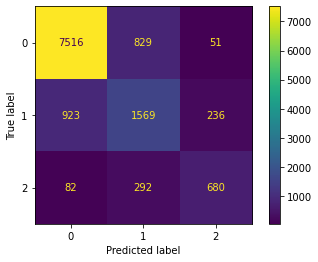

In [ ]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm1.classes_).plot()
plt.show()


In [ ]:
y_pred_train = lgbm1.predict(training_data['X_train'])
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(training_data['y_train'], y_pred_train)))

Training-set accuracy score: 0.9058


In [ ]:
print('Training set score: {:.4f}'.format(lgbm1.score(training_data['X_train'], training_data['y_train'])))

print('Test set score: {:.4f}'.format(lgbm1.score(training_data['X_test'], training_data['y_test'])))

Training set score: 0.9058
Test set score: 0.8019


In [ ]:
# parameter tuning

In [ ]:
param_test1 = {'max_depth'         : [4,5,6,7,8,9, 10]}

Grid_LGBM1 = GridSearchCV(estimator=lgbm1, param_grid = param_test1, cv = 2, n_jobs=-1)
Grid_LGBM1.fit(training_data['X_train'], training_data['y_train'])

GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [ ]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [ ]:
getTrainScores(Grid_LGBM1)

({0: "mean:0.8338957432598686params{'max_depth': 4}",
  1: "mean:0.8466905690885445params{'max_depth': 5}",
  2: "mean:0.8526661745579809params{'max_depth': 6}",
  3: "mean:0.8557594291539246params{'max_depth': 7}",
  4: "mean:0.8555309501212696params{'max_depth': 8}",
  5: "mean:0.8561988119090302params{'max_depth': 9}",
  6: "mean:0.8564448662518893params{'max_depth': 10}"},
 {'best_mean': 0.8564448662518893, 'best_param': {'max_depth': 10}})

In [ ]:
param_test2 = {'max_depth'         : [11, 13, 15]}

Grid_LGBM1 = GridSearchCV(estimator=lgbm1, param_grid = param_test2, cv = 2, n_jobs=-1)
Grid_LGBM1.fit(training_data['X_train'], training_data['y_train'])

GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [11, 13, 15]})

In [ ]:
getTrainScores(Grid_LGBM1)

({0: "mean:0.8557242785335161params{'max_depth': 11}",
  1: "mean:0.8562515378396429params{'max_depth': 13}",
  2: "mean:0.8561460859784176params{'max_depth': 15}"},
 {'best_mean': 0.8562515378396429, 'best_param': {'max_depth': 13}})

In [ ]:
lgbm2 = lgb.LGBMClassifier(max_depth = 13)

lgbm2.fit(training_data['X_train'], training_data['y_train'])
print(lgbm2)

LGBMClassifier(max_depth=13)


              precision    recall  f1-score   support

     class 1       0.88      0.90      0.89      8396
     class 2       0.58      0.57      0.58      2728
     class 3       0.71      0.65      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



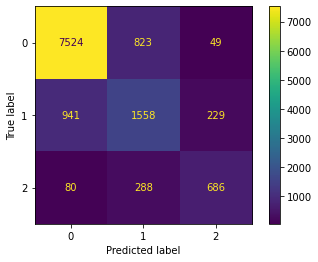

In [ ]:
# predict the results
y_pred=lgbm2.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm2.classes_).plot()
plt.show()


In [ ]:
print('Training set score: {:.4f}'.format(lgbm2.score(training_data['X_train'], training_data['y_train'])))

print('Test set score: {:.4f}'.format(lgbm2.score(training_data['X_test'], training_data['y_test'])))

Training set score: 0.9056
Test set score: 0.8021


In [ ]:
param_test3 = {'num_leaves'         : [70, 90, 110]}

Grid_LGBM2 = GridSearchCV(estimator=lgbm2, param_grid = param_test3, cv = 2, n_jobs=-1)
Grid_LGBM2.fit(training_data['X_train'], training_data['y_train'])

GridSearchCV(cv=2, estimator=LGBMClassifier(max_depth=13), n_jobs=-1,
             param_grid={'num_leaves': [70, 90, 110]})

In [ ]:
getTrainScores(Grid_LGBM2)

({0: "mean:0.8729129319132483params{'num_leaves': 70}",
  1: "mean:0.8773243347745088params{'num_leaves': 90}",
  2: "mean:0.8794685226194242params{'num_leaves': 110}"},
 {'best_mean': 0.8794685226194242, 'best_param': {'num_leaves': 110}})

In [ ]:
param_test3 = {'num_leaves'         : [120, 140, 160]}

Grid_LGBM2 = GridSearchCV(estimator=lgbm2, param_grid = param_test3, cv = 2, n_jobs=-1)
Grid_LGBM2.fit(training_data['X_train'], training_data['y_train'])

GridSearchCV(cv=2, estimator=LGBMClassifier(max_depth=13), n_jobs=-1,
             param_grid={'num_leaves': [120, 140, 160]})

In [ ]:
getTrainScores(Grid_LGBM2)

({0: "mean:0.8803648634398398params{'num_leaves': 120}",
  1: "mean:0.8829835846602693params{'num_leaves': 140}",
  2: "mean:0.8824563253541424params{'num_leaves': 160}"},
 {'best_mean': 0.8829835846602693, 'best_param': {'num_leaves': 140}})

In [ ]:
lgbm3 = lgb.LGBMClassifier(max_depth = 13, num_leaves = 140)

lgbm3.fit(training_data['X_train'], training_data['y_train'])
print(lgbm3)

LGBMClassifier(max_depth=13, num_leaves=140)


              precision    recall  f1-score   support

     class 1       0.88      0.90      0.89      8396
     class 2       0.59      0.59      0.59      2728
     class 3       0.74      0.64      0.69      1054

    accuracy                           0.81     12178
   macro avg       0.74      0.71      0.72     12178
weighted avg       0.80      0.81      0.80     12178



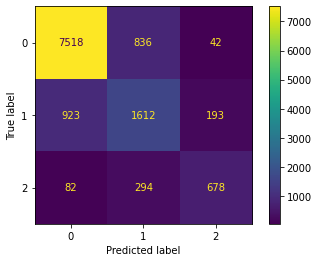

In [ ]:
# predict the results
y_pred=lgbm3.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm3.classes_).plot()
plt.show()

In [ ]:
print('Training set score: {:.4f}'.format(lgbm2.score(training_data['X_train'], training_data['y_train'])))

print('Test set score: {:.4f}'.format(lgbm2.score(training_data['X_test'], training_data['y_test'])))

Training set score: 0.9056
Test set score: 0.8021


In [ ]:
param_test4 = {'min_data_in_leaf'         : [100, 200, 300]}

Grid_LGBM3 = GridSearchCV(estimator=lgbm3, param_grid = param_test4, cv = 2, n_jobs=-1)
Grid_LGBM3.fit(training_data['X_train'], training_data['y_train'])

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


GridSearchCV(cv=2, estimator=LGBMClassifier(max_depth=13, num_leaves=140),
             n_jobs=-1, param_grid={'min_data_in_leaf': [100, 200, 300]})

In [ ]:
getTrainScores(Grid_LGBM3)

({0: "mean:0.8776055397377764params{'min_data_in_leaf': 100}",
  1: "mean:0.8718408379907905params{'min_data_in_leaf': 200}",
  2: "mean:0.865162220113185params{'min_data_in_leaf': 300}"},
 {'best_mean': 0.8776055397377764, 'best_param': {'min_data_in_leaf': 100}})

In [ ]:
param_test4 = {'min_data_in_leaf'         : [40, 60, 80]}

Grid_LGBM3 = GridSearchCV(estimator=lgbm3, param_grid = param_test4, cv = 2, n_jobs=-1)
Grid_LGBM3.fit(training_data['X_train'], training_data['y_train'])

GridSearchCV(cv=2, estimator=LGBMClassifier(max_depth=13, num_leaves=140),
             n_jobs=-1, param_grid={'min_data_in_leaf': [40, 60, 80]})

In [ ]:
getTrainScores(Grid_LGBM3)

({0: "mean:0.8812612042602552params{'min_data_in_leaf': 40}",
  1: "mean:0.8816302857745439params{'min_data_in_leaf': 60}",
  2: "mean:0.8802418362684101params{'min_data_in_leaf': 80}"},
 {'best_mean': 0.8816302857745439, 'best_param': {'min_data_in_leaf': 60}})

In [ ]:
lgbm4 = lgb.LGBMClassifier(max_depth = 13, num_leaves = 140, min_data_in_leaf = 60, objective='multiclass', num_class = 3)
lgbm4.fit(training_data['X_train'], training_data['y_train'])
print(lgbm4)

LGBMClassifier(max_depth=13, min_data_in_leaf=60, num_class=3, num_leaves=140,
               objective='multiclass')


              precision    recall  f1-score   support

     class 1       0.88      0.89      0.89      8396
     class 2       0.58      0.58      0.58      2728
     class 3       0.72      0.63      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.70      0.72     12178
weighted avg       0.80      0.80      0.80     12178



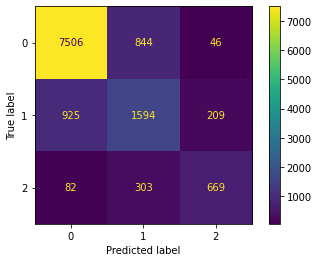

In [ ]:
# predict the results
y_pred=lgbm4.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm4.classes_).plot()
plt.show()

In [ ]:
print('Training set score: {:.4f}'.format(lgbm4.score(training_data['X_train'], training_data['y_train'])))

print('Test set score: {:.4f}'.format(lgbm4.score(training_data['X_test'], training_data['y_test'])))

Training set score: 0.9953
Test set score: 0.8022


In [ ]:
# set boosting to 'Dart'

In [ ]:
lgbm5 = lgb.LGBMClassifier(max_depth = 13, num_leaves = 140, min_data_in_leaf = 40, objective='multiclass', num_class = 3, boosting = 'dart')
lgbm5.fit(training_data['X_train'], training_data['y_train'])
print(lgbm5)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
LGBMClassifier(boosting='dart', max_depth=13, min_data_in_leaf=40, num_class=3,
               num_leaves=140, objective='multiclass')


              precision    recall  f1-score   support

     class 1       0.89      0.88      0.88      8396
     class 2       0.57      0.61      0.59      2728
     class 3       0.72      0.65      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



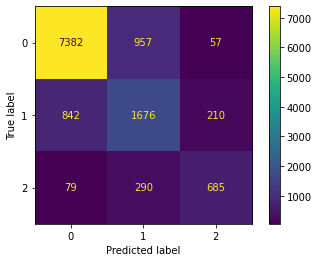

In [ ]:
# predict the results
y_pred=lgbm5.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm5.classes_).plot()
plt.show()

In [ ]:
print('Training set score: {:.4f}'.format(lgbm5.score(training_data['X_train'], training_data['y_train'])))

print('Test set score: {:.4f}'.format(lgbm5.score(training_data['X_test'], training_data['y_test'])))

Training set score: 0.9570
Test set score: 0.8000


In [ ]:
lgbm6 = lgb.LGBMClassifier(max_depth = 13, 
                           num_leaves = 140, 
                           min_data_in_leaf = 40, 
                           objective='multiclass', 
                           num_class = 3, 
                           boosting = 'dart', 
                           force_col_wise=True)
lgbm6.fit(training_data['X_train'], training_data['y_train'])
print(lgbm6)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
LGBMClassifier(boosting='dart', force_col_wise=True, max_depth=13,
               min_data_in_leaf=40, num_class=3, num_leaves=140,
               objective='multiclass')


              precision    recall  f1-score   support

     class 1       0.89      0.88      0.88      8396
     class 2       0.57      0.62      0.59      2728
     class 3       0.71      0.65      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.72      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



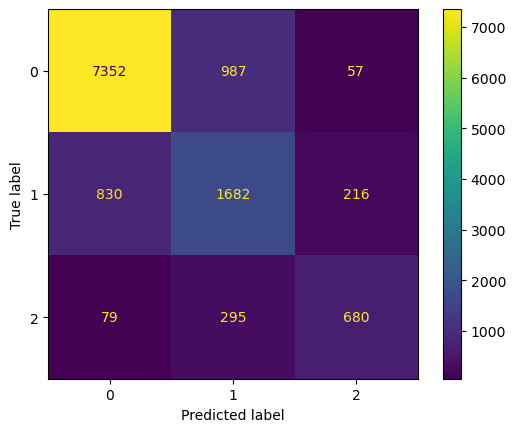

In [ ]:
# predict the results
y_pred=lgbm6.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm6.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm6.classes_).plot()
plt.show()

In [ ]:
print('Training set score: {:.4f}'.format(lgbm5.score(training_data['X_train'], training_data['y_train'])))

print('Test set score: {:.4f}'.format(lgbm5.score(training_data['X_test'], training_data['y_test'])))

NameError: name 'lgbm5' is not defined

In [ ]:
param_test5 = {'max_bin'         : [20, 40, 60]}

Grid_LGBM4 = GridSearchCV(estimator=lgbm5, param_grid = param_test5, cv = 2, n_jobs=-1)
Grid_LGBM4.fit(training_data['X_train'], training_data['y_train'])

In [ ]:
getTrainScores(Grid_LGBM4)

({0: "mean:0.8612077753172344params{'max_bin': 20}",
  1: "mean:0.8643186052233822params{'max_bin': 40}",
  2: "mean:0.8641252768111357params{'max_bin': 60}"},
 {'best_mean': 0.8643186052233822, 'best_param': {'max_bin': 40}})

In [ ]:
param_test5 = {'max_bin'         : [60, 80, 100]}

Grid_LGBM4 = GridSearchCV(estimator=lgbm5, param_grid = param_test5, cv = 2, n_jobs=-1)
Grid_LGBM4.fit(training_data['X_train'], training_data['y_train'])

GridSearchCV(cv=2,
             estimator=LGBMClassifier(boosting='dart', max_depth=13,
                                      min_data_in_leaf=40, num_class=3,
                                      num_leaves=140, objective='multiclass'),
             n_jobs=-1, param_grid={'max_bin': [60, 80, 100]})

In [ ]:
getTrainScores(Grid_LGBM4)

({0: "mean:0.8641252768111357params{'max_bin': 60}",
  1: "mean:0.8651797954233893params{'max_bin': 80}",
  2: "mean:0.8641604274315442params{'max_bin': 100}"},
 {'best_mean': 0.8651797954233893, 'best_param': {'max_bin': 80}})

In [ ]:
param_test5 = {'max_bin'         : [40, 80]}

Grid_LGBM4 = GridSearchCV(estimator=lgbm5, param_grid = param_test5, cv = 2, n_jobs=-1)
Grid_LGBM4.fit(training_data['X_train'], training_data['y_train'])

getTrainScores(Grid_LGBM4)

({0: "mean:0.8643186052233822params{'max_bin': 40}",
  1: "mean:0.8651797954233893params{'max_bin': 80}"},
 {'best_mean': 0.8651797954233893, 'best_param': {'max_bin': 80}})

In [ ]:
lgbm7 = lgb.LGBMClassifier(max_depth = 13, 
                           num_leaves = 140, 
                           min_data_in_leaf = 40, 
                           objective='multiclass', 
                           num_class = 3, 
                           boosting = 'dart', 
                           force_col_wise=True, 
                           max_bin = 80)
lgbm7.fit(training_data['X_train'], training_data['y_train'])
print(lgbm7)

LGBMClassifier(boosting='dart', force_col_wise=True, max_bin=80, max_depth=13,
               min_data_in_leaf=40, num_class=3, num_leaves=140,
               objective='multiclass')


              precision    recall  f1-score   support

     class 1       0.89      0.88      0.88      8396
     class 2       0.57      0.61      0.59      2728
     class 3       0.72      0.65      0.69      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.72      0.72     12178
weighted avg       0.80      0.80      0.80     12178



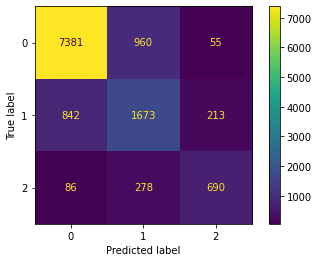

In [ ]:
# predict the results
y_pred=lgbm7.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm7.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm7.classes_).plot()
plt.show()

In [ ]:
print('Training set score: {:.4f}'.format(lgbm6.score(training_data['X_train'], training_data['y_train'])))

print('Test set score: {:.4f}'.format(lgbm6.score(training_data['X_test'], training_data['y_test'])))

Training set score: 0.9570
Test set score: 0.8000
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

In [ ]:
param_test6 = {'learning_rate'         : [40, 80]}

Grid_LGBM4 = GridSearchCV(estimator=lgbm5, param_grid = param_test5, cv = 2, n_jobs=-1)
Grid_LGBM4.fit(training_data['X_train'], training_data['y_train'])

getTrainScores(Grid_LGBM4)

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 20.6 MB/s eta 0:00:00


In [ ]:

from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

In [ ]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params


In [ ]:
clf = lgb.LGBMClassifier(boosting_type='dart',
                         metric='multi_logloss',
                         objective='multiclass',
                         num_class = 3,
                         n_jobs=1, 
                         verbose=-1,
                         random_state=42)


In [ ]:
search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),     # Boosting learning rate
    'n_estimators': Integer(30, 5000),                   # Number of boosted trees to fit
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'min_child_samples': Integer(1, 256),                # Minimal number of data in one leaf
    'max_bin': Integer(100, 1000),                       # Max number of bins that feature values will be bucketed
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(0, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'min_child_weight': Real(0.01, 10.0, 'uniform'),     # Minimum sum of instance weight (hessian) needed in a child (leaf)
    'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
        }

In [ ]:
opt = BayesSearchCV(estimator=clf,                                    
                    search_spaces=search_spaces,                      
                    scoring='f1_macro',                                  
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),                                          
                    n_iter=1000,                                      # max number of trials
                    n_points=4,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=-1,                                        # number of jobs
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=42)                                   # random state for replicability

In [ ]:
from time import time
import pprint
import joblib

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

In [ ]:
overdone_control = DeltaYStopper(delta=0.0001)               # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60 * 60)     # We impose a time limit (45 minutes)

best_params = report_perf(opt, training_data['X_train'], training_data['y_train'],'LightGBM', 
                          callbacks=[overdone_control, time_limit_control])

LightGBM took 3010.76 seconds,  candidates checked: 3, best CV score: 0.903 ± 0.003
Best parameters:
OrderedDict([('colsample_bytree', 0.4160029192647807),
             ('learning_rate', 0.28539836866041823),
             ('max_bin', 940),
             ('max_depth', 80),
             ('min_child_samples', 172),
             ('min_child_weight', 4.14704513853053),
             ('n_estimators', 1774),
             ('num_leaves', 379),
             ('reg_alpha', 2.234068172197576e-06),
             ('reg_lambda', 0.013356955276561592),
             ('subsample', 0.5544643023916863),
             ('subsample_freq', 1)])



In [ ]:
lgbm8 = lgb.LGBMClassifier(colsample_bytree = 0.4160029192647807,
                           learning_rate = 0.28539836866041823,
                           max_bin = 940,
                           max_depth= 80,
                           min_child_samples= 172,
                           min_child_weight= 4.14704513853053,
                           n_estimators= 1774,
                           num_leaves= 379,
                           reg_alpha= 2.234068172197576e-06,
                           reg_lambda= 0.013356955276561592,
                           subsample= 0.5544643023916863,
                           subsample_freq= 1,
                           objective='multiclass', 
                           num_class = 3, 
                           boosting = 'dart', 
                           force_col_wise=True)
lgbm8.fit(training_data['X_train'], training_data['y_train'])
print(lgbm8)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
LGBMClassifier(boosting='dart', colsample_bytree=0.4160029192647807,
               force_col_wise=True, learning_rate=0.28539836866041823,
               max_bin=940, max_depth=80, min_child_samples=172,
               min_child_weight=4.14704513853053, n_estimators=1774,
               num_class=3, num_leaves=379, objective='multiclass',
               reg_alpha=2.234068172197576e-06, reg_lambda=0.013356955276561592,
               subsample=0.5544643023916863, subsample_freq=1)


              precision    recall  f1-score   support

     class 1       0.88      0.89      0.88      8396
     class 2       0.57      0.56      0.57      2728
     class 3       0.73      0.65      0.69      1054

    accuracy                           0.80     12178
   macro avg       0.72      0.70      0.71     12178
weighted avg       0.79      0.80      0.79     12178



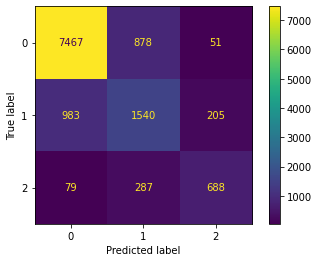

In [ ]:
# predict the results
y_pred=lgbm8.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm8.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm8.classes_).plot()
plt.show()

In [ ]:
overdone_control = DeltaYStopper(delta=0.0001)               # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60 * 120)     # We impose a time limit (45 minutes)

best_params = report_perf(opt, training_data['X_train'], training_data['y_train'],'LightGBM', 
                          callbacks=[overdone_control, time_limit_control])

LightGBM took 9888.87 seconds,  candidates checked: 6, best CV score: 0.904 ± 0.002
Best parameters:
OrderedDict([('colsample_bytree', 0.8390144719977516),
             ('learning_rate', 0.5842928269761146),
             ('max_bin', 373),
             ('max_depth', 243),
             ('min_child_samples', 221),
             ('min_child_weight', 0.6325062790322741),
             ('n_estimators', 717),
             ('num_leaves', 182),
             ('reg_alpha', 0.009840566956156354),
             ('reg_lambda', 30.78092396369155),
             ('subsample', 0.6336020558163782),
             ('subsample_freq', 10)])



In [ ]:
lgbm9 = lgb.LGBMClassifier(colsample_bytree = 0.8390144719977516,
                           learning_rate = 0.5842928269761146,
                           max_bin = 373,
                           max_depth= 243,
                           min_child_samples= 221,
                           min_child_weight= 0.6325062790322741,
                           n_estimators= 717,
                           num_leaves= 182,
                           reg_alpha= 0.009840566956156354,
                           reg_lambda= 30.78092396369155,
                           subsample= 0.6336020558163782,
                           subsample_freq= 10,
                           objective='multiclass', 
                           num_class = 3, 
                           boosting = 'dart', 
                           force_col_wise=True)
lgbm9.fit(training_data['X_train'], training_data['y_train'])
print(lgbm9)

NameError: name 'lgbm' is not defined

In [ ]:
print(lgbm9)

LGBMClassifier(boosting='dart', colsample_bytree=0.8390144719977516,
               force_col_wise=True, learning_rate=0.5842928269761146,
               max_bin=373, max_depth=243, min_child_samples=221,
               min_child_weight=0.6325062790322741, n_estimators=717,
               num_class=3, num_leaves=182, objective='multiclass',
               reg_alpha=0.009840566956156354, reg_lambda=30.78092396369155,
               subsample=0.6336020558163782, subsample_freq=10)


              precision    recall  f1-score   support

     class 1       0.88      0.89      0.89      8396
     class 2       0.58      0.58      0.58      2728
     class 3       0.74      0.65      0.69      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



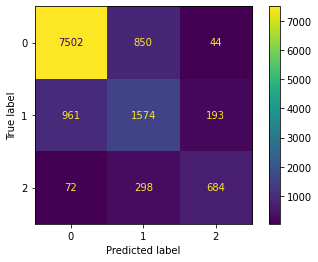

In [ ]:
# predict the results
y_pred=lgbm9.predict(training_data['X_test'])
# metrics

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=lgbm9.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm9.classes_).plot()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

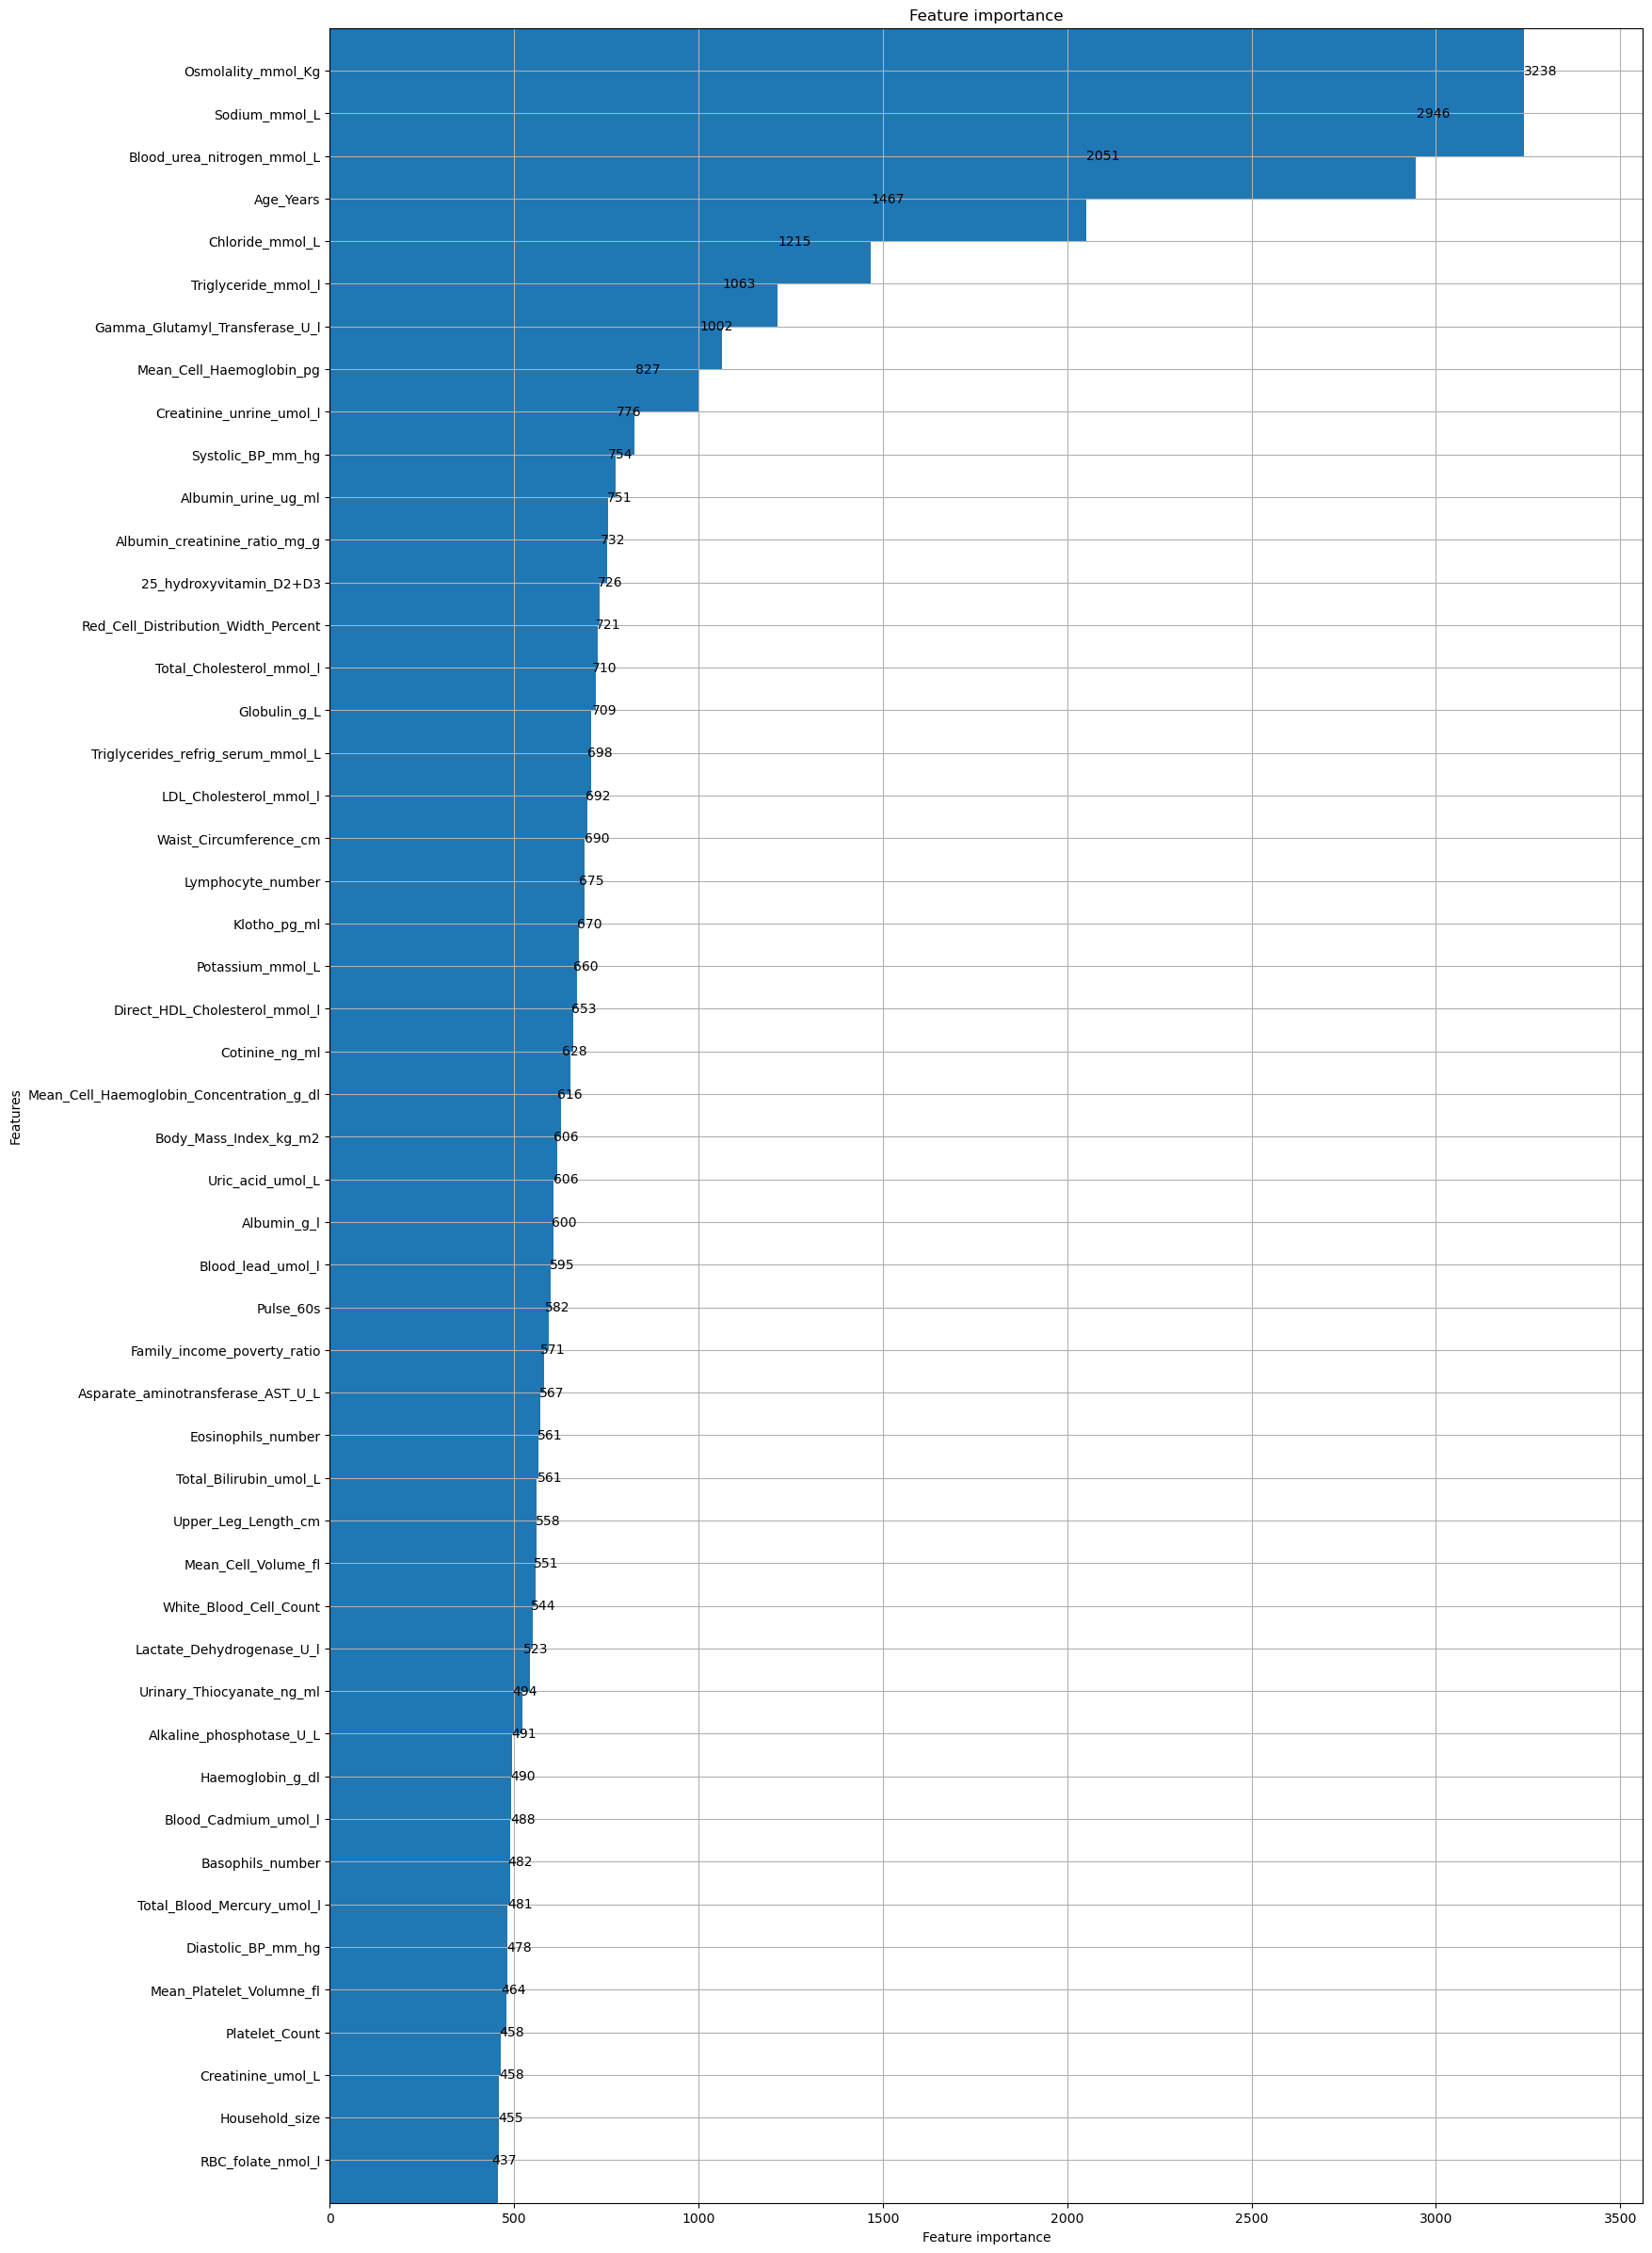

In [ ]:
lgb.plot_importance(lgbm6, height = 4.0, figsize = (18, 30), max_num_features = 50)

<AxesSubplot:title={'center':'Split value histogram for feature with name Family_income_poverty_ratio'}, xlabel='Feature split value', ylabel='Count'>

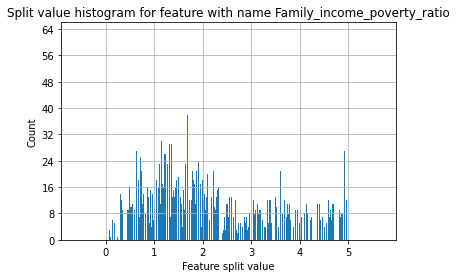

In [ ]:
lgb.plot_split_value_histogram(lgbm9, feature = 'Family_income_poverty_ratio')

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(12178, 3)

In [ ]:
class_of_interest = 1 # normal
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

In [ ]:
y_score = lgbm6.predict_proba(training_data['X_test'].values)

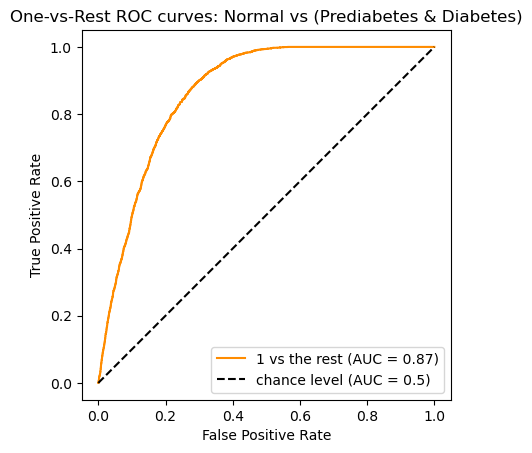

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves: Normal vs (Prediabetes & Diabetes)")
plt.legend()
plt.show()

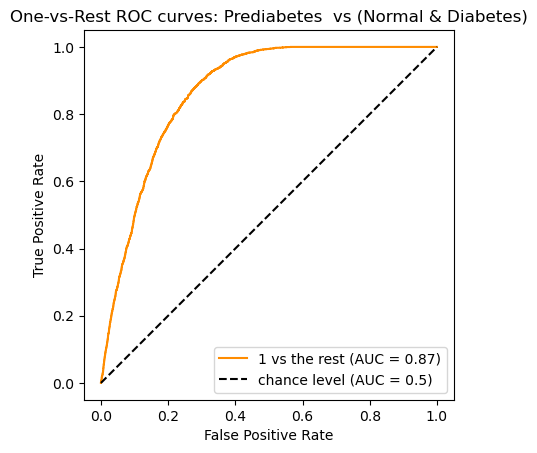

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, 1],
    y_score[:, 1],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves: Prediabetes  vs (Normal & Diabetes)")
plt.legend()
plt.show()

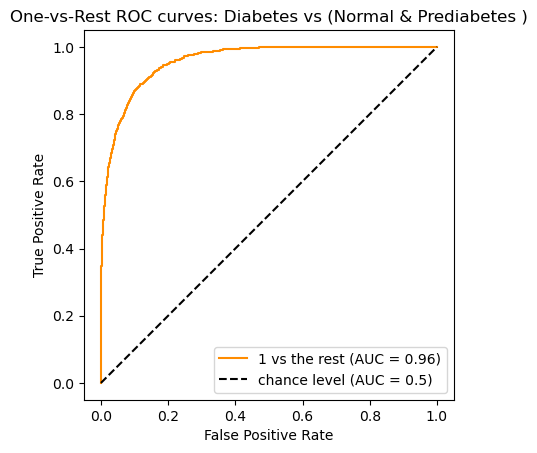

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, 2],
    y_score[:, 2],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves: Diabetes vs (Normal & Prediabetes )")
plt.legend()
plt.show()

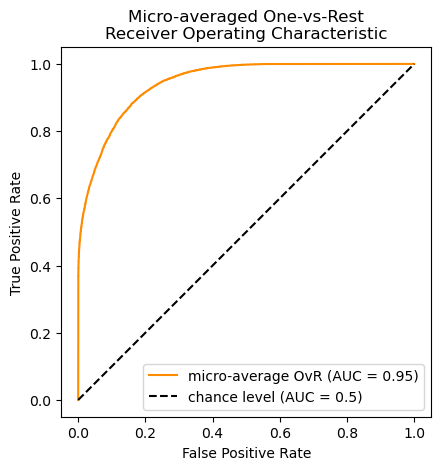

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.95


In [ ]:
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.92


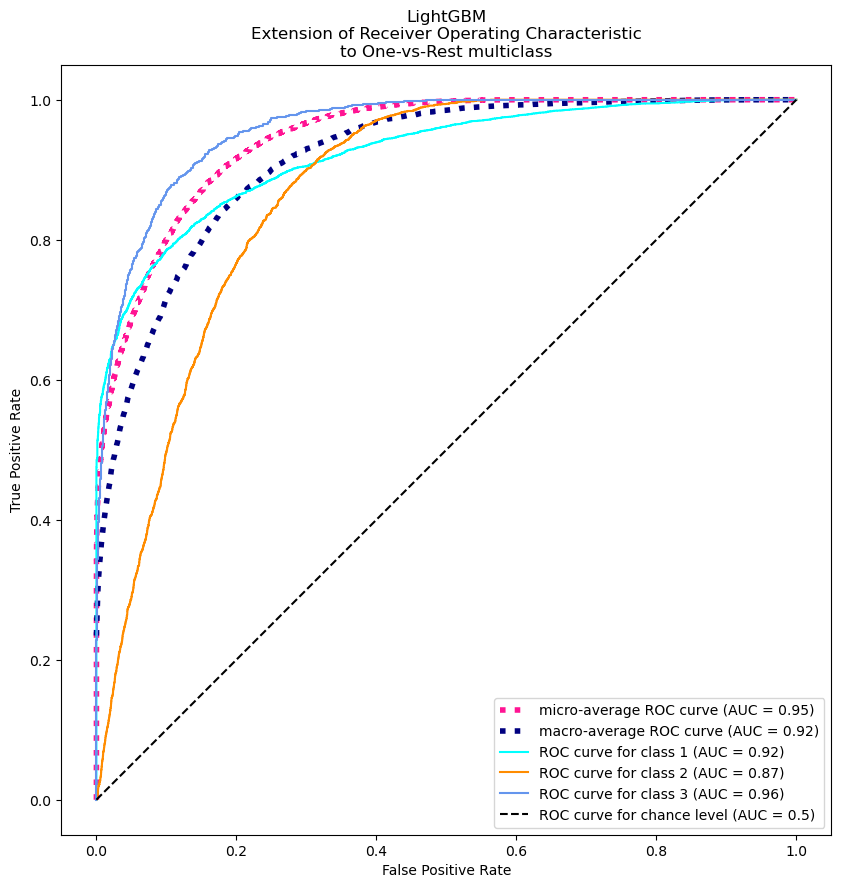

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LightGBM\nExtension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

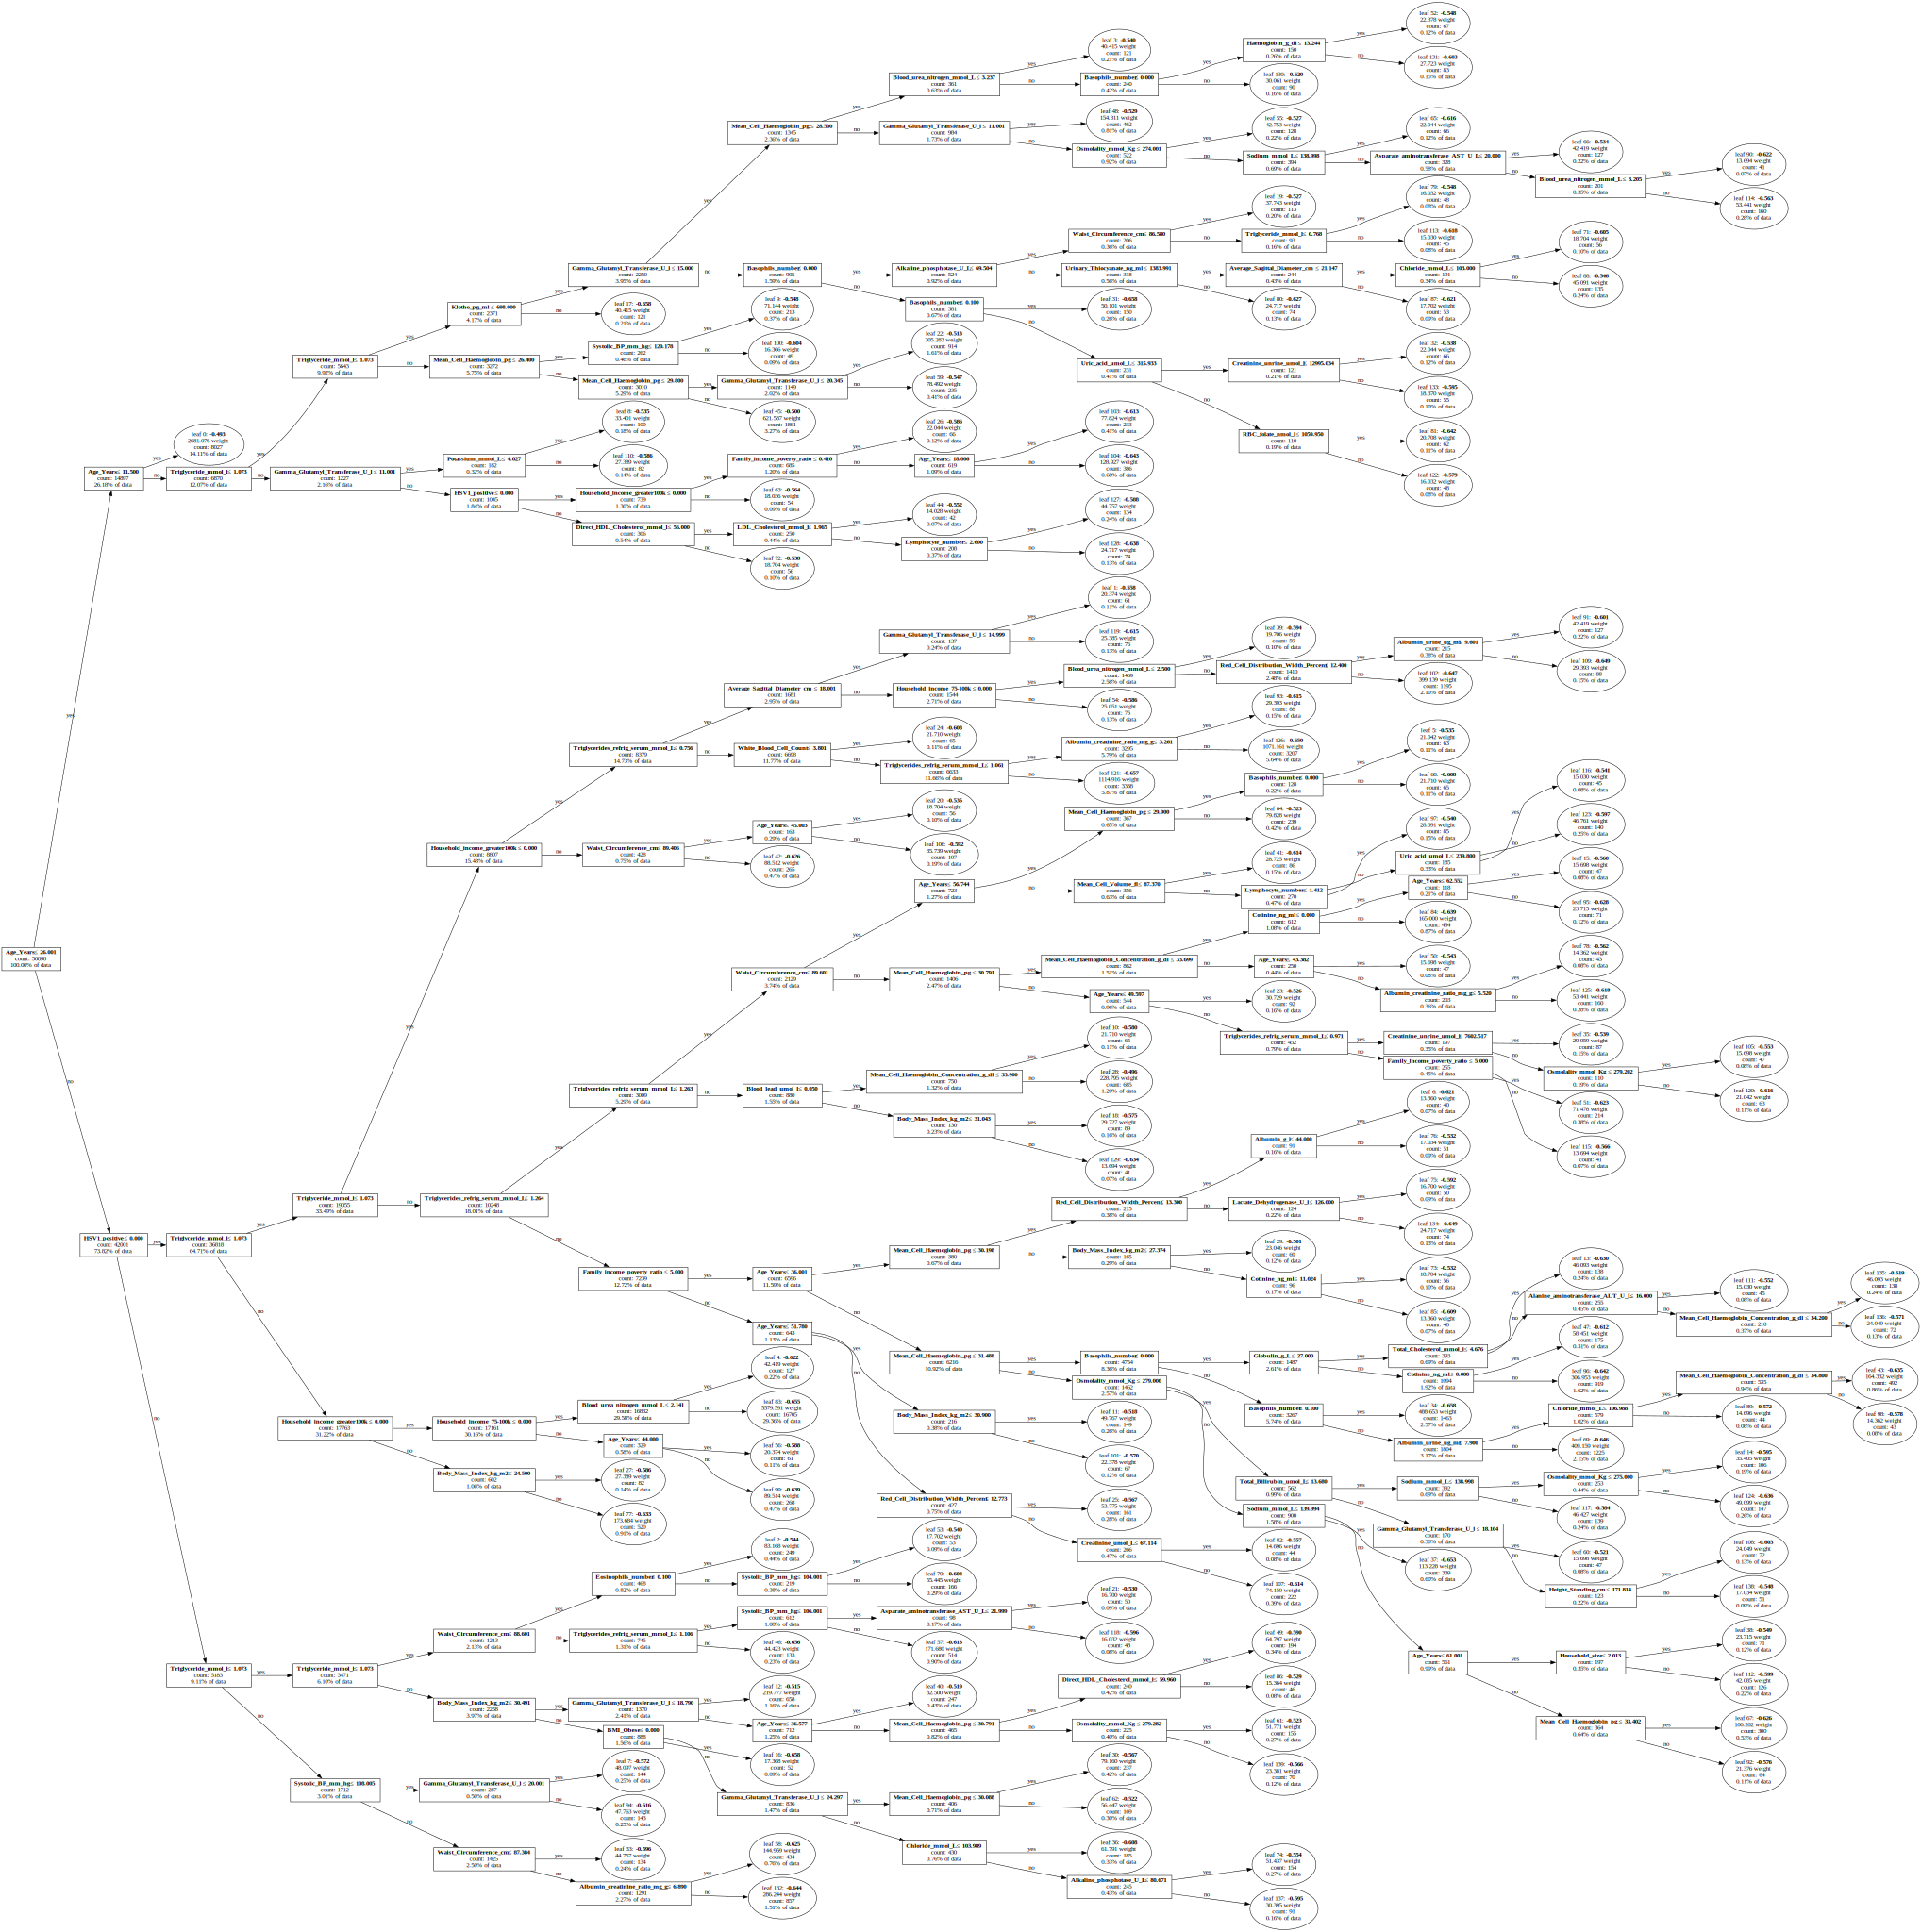

In [ ]:
# plot tree

ax = lgb.create_tree_digraph(lgbm6, show_info=['internal_count', 'leaf_count', 'leaf_weight', 'data_percentage'])

ax


In [ ]:
import dice_ml

In [ ]:
X_train_data = training_data['X_train']
X_train_data['diabetes'] = training_data['y_train']
X_train_data.head()

,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
73337,261.925494,5.693852,26.560058,32.015080,5.378443,29.687988,1.527690,69.191896,1.073000,23.071780,...,0,0,0,0,75.535890,0,0,0,0,2
32160,315.200000,4.280000,51.000000,25.000000,1.264000,28.000000,0.000000,1.000000,1.073000,18.000000,...,0,0,0,0,12.400000,1,0,0,0,0
59677,269.628288,7.098130,47.703672,32.164547,2.288454,29.837959,2.236347,65.703672,2.160671,26.078779,...,1,0,0,0,78.942699,0,0,0,0,2
50493,328.073128,4.151990,42.098520,26.642616,1.395720,31.377337,10.922371,51.180296,1.484094,27.310357,...,0,0,0,0,79.783370,0,0,0,0,1
23695,315.200000,4.280000,51.000000,16.200000,1.264000,28.000000,0.000000,3.000000,1.073000,18.000000,...,0,0,0,0,17.400000,0,0,0,0,0


In [ ]:
train_features = train_features.to_list()

# continuous_features_list = ['Uric_acid_umol_L', 'Blood_urea_nitrogen_mmol_L',
    #    'Direct_HDL_Cholesterol_mmol_l', 'Body_Mass_Index_kg_m2',
    #    'Triglycerides_refrig_serum_mmol_L', 'Globulin_g_L',
    #    'Blood_Cadmium_umol_l', 'Age_Years', 'Triglyceride_mmol_l',
    #    'Gamma_Glutamyl_Transferase_U_l', 'Pulse_60s', 'Klotho_pg_ml',
    #    'Creatinine_umol_L', 'Systolic_BP_mm_hg', 'Waist_Circumference_cm',
    #    'Total_Blood_Mercury_umol_l', 'Mean_Platelet_Volumne_fl',
    #    'Urinary_Thiocyanate_ng_ml', 'Red_Cell_Distribution_Width_Percent',
    #    'Osmolality_mmol_Kg', 'Asparate_aminotransferase_AST_U_L',
    #    'Total_Cholesterol_mmol_l', 'Albumin_g_l', 'Upper_Leg_Length_cm',
    #    'Albumin_urine_ug_ml', 'Sodium_mmol_L', 'Cotinine_ng_ml',
    #    'RBC_folate_nmol_l', 'Blood_lead_umol_l',
    #    'Albumin_creatinine_ratio_mg_g', 'Creatinine_unrine_umol_l',
    #    'Chloride_mmol_L', 'Household_size', 'Average_Sagittal_Diameter_cm',
    #    'Platelet_Count', 'Diastolic_BP_mm_hg', 'Arm_circumference_cm',
    #    '25_hydroxyvitamin_D2+D3', 'LDL_Cholesterol_mmol_l',
    #    'Mean_Cell_Haemoglobin_Concentration_g_dl', 'Haemoglobin_g_dl',
    #    'Mean_Cell_Haemoglobin_pg', 'Basophils_number',
    #    'Total_Bilirubin_umol_L', 'Family_income_poverty_ratio',
    #    'White_Blood_Cell_Count', 'Potassium_mmol_L',
    #    'Alkaline_phosphotase_U_L', 'Lymphocyte_number', 'Eosinophils_number',
    #    'Lactate_Dehydrogenase_U_l', 'Mean_Cell_Volume_fl', 'RBC_Folate_nmol_l',
    #    'Alanine_aminotransferase_ALT_U_L']

In [ ]:

d_lgbm = dice_ml.Data(dataframe=training_data['X_train'],
                      continuous_features=train_features,
                      outcome_name='diabetes')



# We provide the type of model as a parameter (model_type)
m_lgbm = dice_ml.Model(model=lgbm6, backend="sklearn", model_type='classifier')



In [ ]:
from dice_ml import Dice

exp_genetic_lgbm = Dice(d_lgbm, m_lgbm, method="genetic")

In [ ]:


# Multiple queries can be given as input at once
query_instances_lgbm = training_data['X_test'][17:23]
genetic_lgbm = exp_genetic_lgbm.generate_counterfactuals(query_instances_lgbm, total_CFs=10, desired_class=1)
genetic_lgbm.visualize_as_dataframe(show_only_changes=True)



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]Query instance (original outcome : 0)



,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,297.399994,2.14,41.0,23.35,1.287,29.0,3.11,23.0,1.411,14.0,...,0.0,1.0,0.0,0.0,70.199997,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,297.4,7.14,50.0,24.0,0.835,24.0,2.94,80.0,0.881,13.0,...,-,0.0,-,-,66.0,-,-,-,-,1.0
0,309.3,4.64,76.0,29.0,0.644,25.0,1.25,72.0,0.689,22.0,...,-,0.0,-,-,82.6,-,-,-,-,1.0
0,374.7,3.21,50.0,27.4,1.174,32.0,2.14,33.0,1.118,20.0,...,-,-,-,-,81.4,-,-,-,-,1.0
0,356.9,3.57,47.0,33.6,1.129,34.0,3.47,76.0,1.106,24.0,...,-,0.0,-,-,87.3,-,-,-,-,1.0
0,267.7,2.14,58.0,26.7,2.1,40.0,4.45,40.0,1.073,86.0,...,1.0,-,-,-,78.6,-,-,-,-,1.0
0,249.8,7.14,7.0,24.0,0.835,30.4,3.91,80.0,0.628,13.0,...,-,0.0,-,-,56.2,-,-,-,-,1.0
0,303.3,6.07,73.0,20.0,0.971,-,10.41,77.0,1.073,31.0,...,-,0.0,-,-,53.3,-,-,-,-,1.0
0,362.8,7.5,56.0,27.4,1.931,-,4.45,65.0,1.919,24.0,...,-,0.0,-,-,75.0,-,1.0,-,-,1.0
0,296.9,0.71,62.4,12.1,1.544,28.9,2.02,63.8,1.089,16.1,...,-,0.0,-,-,73.9,-,-,-,-,1.0
0,345.0,2.86,49.0,30.6,1.671,31.0,5.07,63.0,1.682,23.0,...,-,0.0,-,-,77.7,-,-,-,-,1.0


Query instance (original outcome : 0)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,315.200012,4.28,51.0,15.3,1.264,28.0,0.0,2.0,1.073,18.0,...,0.0,0.0,0.0,0.0,12.3,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,315.2,4.28,43.0,24.9,1.264,-,1.51,49.0,1.073,-,...,-,-,-,-,60.3,-,-,-,-,1.0
0,243.9,3.57,73.0,27.1,0.655,27.0,1.96,80.0,1.073,12.0,...,-,-,-,-,62.0,-,-,-,-,1.0
0,267.7,6.07,52.0,24.1,0.903,26.0,4.45,80.0,1.073,12.0,...,-,-,-,-,54.4,-,-,-,-,1.0
0,391.6,7.37,47.3,25.2,1.917,27.9,1.96,32.1,1.073,21.8,...,-,-,-,-,65.3,-,-,-,-,1.0
0,375.5,6.95,50.1,25.4,1.779,27.8,1.96,37.3,1.073,20.7,...,-,-,-,-,64.9,-,-,-,-,1.0
0,253.3,3.81,71.4,27.0,0.735,27.1,1.96,77.0,1.073,12.6,...,-,-,-,-,62.2,-,-,-,-,1.0
0,244.9,4.28,7.0,24.6,0.655,7.0,1.96,27.2,0.867,12.0,...,-,-,-,-,66.4,-,-,-,-,1.0
0,279.6,6.07,92.0,15.9,1.287,29.0,5.07,80.0,1.073,23.0,...,-,-,-,1.0,39.1,-,-,-,-,1.0
0,279.6,5.36,57.0,29.6,1.084,23.0,-,50.0,1.118,56.0,...,-,-,-,-,73.4,-,-,-,-,1.0
0,23.8,6.07,55.0,24.1,0.903,26.0,4.72,80.0,1.129,17.0,...,-,-,-,-,58.2,-,-,-,-,1.0


Query instance (original outcome : 0)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,291.5,3.57,48.0,23.5,2.393,28.0,2.85,52.0,2.224,20.0,...,0.0,0.0,0.0,0.0,71.400002,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,350.9,4.64,42.0,28.9,1.84,26.0,1.96,54.0,1.073,15.0,...,-,-,-,-,76.5,-,-,-,-,1.0
0,368.8,2.86,54.0,21.2,1.039,22.0,1.96,21.0,0.937,15.0,...,-,-,-,-,68.8,-,-,-,-,1.0
0,226.0,7.14,59.0,24.3,2.698,26.0,1.96,55.0,1.073,14.0,...,-,-,-,-,63.5,-,-,-,-,1.0
0,339.0,5.36,68.0,21.5,1.874,27.0,1.96,73.0,1.648,17.0,...,-,-,-,-,52.0,-,-,-,-,1.0
0,252.8,6.68,53.5,24.8,2.52,27.0,1.96,60.1,1.073,16.3,...,-,-,-,-,62.1,-,-,-,-,1.0
0,202.2,5.36,63.0,28.9,1.897,26.0,3.29,50.0,1.953,25.0,...,-,-,-,-,78.1,-,-,-,-,1.0
0,255.7,3.57,50.5,27.1,0.102,25.0,0.0,47.0,0.974,18.0,...,-,-,-,-,69.6,-,-,-,-,1.0
0,345.0,6.43,68.0,27.0,0.734,29.0,1.96,80.0,0.711,18.0,...,-,-,-,-,80.8,-,-,-,-,1.0
0,232.0,3.21,38.0,25.0,1.264,34.0,1.96,56.0,1.253,13.0,...,-,-,-,-,65.7,1.0,-,-,-,1.0
0,232.0,8.21,69.0,25.9,0.914,22.0,2.94,67.0,1.073,19.0,...,-,-,-,-,72.0,-,-,-,-,1.0


Query instance (original outcome : 0)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,315.200012,4.28,62.0,17.139999,1.264,28.0,1.25,10.0,1.073,18.0,...,0.0,0.0,1.0,0.0,40.599998,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,362.8,5.71,64.0,24.9,0.632,26.0,-,34.0,0.7,19.0,...,-,-,0.0,-,80.6,-,-,-,-,1.0
0,333.1,5.0,54.0,30.8,1.264,30.0,0.0,31.0,1.366,19.0,...,1.0,1.0,0.0,-,95.0,-,-,-,-,1.0
0,265.6,3.75,7.0,33.7,2.832,30.5,3.38,41.0,1.073,42.0,...,-,-,0.0,-,2.7,-,-,-,-,1.0
0,292.8,4.7,35.7,34.9,2.766,28.7,3.76,50.4,1.073,29.1,...,-,-,0.0,-,104.3,-,-,-,-,1.0
0,517.5,4.64,26.0,29.4,2.213,-,0.0,40.0,2.382,22.0,...,-,-,0.0,-,91.2,-,1.0,-,-,1.0
0,416.4,6.43,61.0,22.6,0.948,34.0,1.87,39.0,1.073,29.0,...,-,1.0,0.0,-,76.2,-,-,-,-,1.0
0,315.2,3.93,26.0,29.0,3.952,33.0,3.38,31.0,1.073,42.0,...,1.0,1.0,0.0,-,86.2,-,-,-,-,1.0
0,292.8,3.93,7.0,34.9,3.952,28.7,3.76,50.4,1.073,42.0,...,1.0,1.0,0.0,-,2.7,-,-,-,-,1.0
0,421.5,7.21,38.0,25.3,2.112,28.8,1.38,66.8,1.073,25.8,...,-,-,0.0,-,65.2,-,-,-,-,1.0
0,23.8,5.0,7.0,30.8,1.264,31.0,0.0,31.0,0.147,34.0,...,1.0,-,0.0,-,95.0,-,-,-,-,1.0


Query instance (original outcome : 0)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,184.399994,3.21,60.0,39.5,0.621,29.0,1.96,34.0,0.565,15.0,...,1.0,1.0,0.0,0.0,97.099998,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,362.8,6.07,47.0,38.9,1.795,-,1.96,60.0,1.535,13.0,...,0.0,0.0,-,-,108.2,-,-,-,-,1.0
0,226.0,5.36,48.0,30.7,1.592,26.0,1.96,71.0,1.513,-,...,-,0.0,-,-,74.5,-,-,-,-,1.0
0,368.8,3.57,49.0,28.2,1.027,34.0,1.96,27.0,0.892,22.0,...,-,-,-,-,86.5,-,-,-,-,1.0
0,202.2,3.21,10.0,32.6,1.716,28.0,1.96,32.0,1.569,10.0,...,0.0,0.0,-,-,97.6,-,-,-,-,1.0
0,208.2,2.14,44.0,24.7,2.668,7.0,2.76,43.6,0.147,-,...,0.0,0.0,-,-,97.9,-,-,-,-,1.0
0,279.6,4.28,32.0,37.2,2.811,24.0,1.96,41.0,1.073,37.0,...,0.0,0.0,-,-,106.9,-,-,-,-,1.0
0,410.4,6.78,40.0,40.9,0.768,-,1.96,61.0,1.073,17.0,...,-,0.0,-,-,118.6,-,-,-,-,1.0
0,291.6,6.41,7.0,12.1,2.558,26.8,1.96,55.1,1.073,10.6,...,0.0,0.0,-,-,66.4,-,-,-,-,1.0
0,202.2,3.21,48.0,30.7,1.592,28.0,1.96,32.0,1.569,-,...,-,0.0,-,-,97.6,-,-,-,-,1.0
0,226.0,5.36,34.8,34.2,1.592,24.0,1.96,71.0,1.073,-,...,-,0.0,-,-,74.5,-,-,-,-,1.0


Query instance (original outcome : 0)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,255.800003,3.21,82.0,24.309999,0.519,32.0,5.34,22.0,0.621,17.0,...,1.0,1.0,0.0,0.0,63.799999,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,279.6,2.5,85.0,26.8,0.971,33.0,2.22,67.0,0.982,19.0,...,-,0.0,-,-,65.2,-,-,-,-,1.0
0,243.9,7.85,38.0,39.7,2.134,33.0,2.85,38.0,2.258,18.0,...,-,-,-,-,92.0,-,-,-,-,1.0
0,374.7,2.5,31.0,31.3,1.818,31.0,0.0,37.0,1.716,26.0,...,-,-,-,-,101.8,-,1.0,-,-,1.0
0,208.2,2.14,44.0,24.7,1.298,38.0,2.76,16.0,1.242,15.0,...,0.0,0.0,-,-,73.2,-,-,-,-,1.0
0,279.6,4.09,85.0,26.8,1.184,28.1,2.27,67.0,0.147,19.0,...,0.0,0.0,-,-,70.2,-,-,-,-,1.0
0,267.7,3.93,34.0,40.5,2.518,24.0,0.0,48.0,1.073,-,...,0.0,0.0,-,-,109.6,-,-,-,-,1.0
0,226.0,5.36,48.0,30.7,1.592,26.0,1.96,71.0,1.513,15.0,...,-,0.0,-,-,74.5,-,-,-,-,1.0
0,208.2,2.14,44.0,12.1,1.298,38.0,2.76,60.1,1.073,16.3,...,0.0,0.0,-,-,62.1,-,-,-,-,1.0
0,285.5,4.28,41.0,23.8,1.468,26.0,4.63,80.0,1.073,11.0,...,0.0,0.0,-,-,54.5,-,-,-,-,1.0
0,279.6,4.28,70.0,22.0,1.061,-,0.0,53.0,1.005,12.0,...,0.0,0.0,-,-,55.5,-,-,-,-,1.0


In [ ]:
# Multiple queries can be given as input at once
query_instances_lgbm = training_data['X_test'][17:18]
genetic_lgbm = exp_genetic_lgbm.generate_counterfactuals(query_instances_lgbm, total_CFs=10, desired_class=1)
genetic_lgbm.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:01<00:00,  1.52s/it]Query instance (original outcome : 0)



,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,297.399994,2.14,41.0,23.35,1.287,29.0,3.11,23.0,1.411,14.0,...,0.0,1.0,0.0,0.0,70.199997,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade,diabetes
0,297.4,7.14,50.0,24.0,0.835,24.0,2.94,80.0,0.881,13.0,...,-,0.0,-,-,66.0,-,-,-,-,1.0
0,297.4,0.71,50.0,29.4,0.835,7.0,0.0,80.0,0.881,13.0,...,-,0.0,-,-,66.0,-,-,-,-,1.0
0,309.3,4.64,76.0,29.0,0.644,25.0,1.25,72.0,0.689,22.0,...,-,0.0,-,-,82.6,-,-,-,-,1.0
0,374.7,3.21,50.0,27.4,1.174,32.0,2.14,33.0,1.118,20.0,...,-,-,-,-,81.4,-,-,-,-,1.0
0,356.9,3.57,47.0,33.6,1.129,34.0,3.47,76.0,1.106,24.0,...,-,0.0,-,-,87.3,-,-,-,-,1.0
0,267.7,2.14,58.0,26.7,2.1,40.0,4.45,40.0,1.073,86.0,...,1.0,-,-,-,78.6,-,-,-,-,1.0
0,303.3,6.07,73.0,20.0,0.971,-,10.41,77.0,1.073,31.0,...,-,0.0,-,-,53.3,-,-,-,-,1.0
0,362.8,7.5,56.0,27.4,1.931,-,4.45,65.0,1.919,24.0,...,-,0.0,-,-,75.0,-,1.0,-,-,1.0
0,233.0,5.7,73.0,29.4,0.971,-,0.37,38.4,1.006,30.6,...,-,0.0,-,-,75.5,-,-,-,-,1.0
0,345.0,2.86,49.0,30.6,1.671,31.0,5.07,63.0,1.682,23.0,...,-,0.0,-,-,77.7,-,-,-,-,1.0


In [ ]:
imp = exp_genetic_lgbm.local_feature_importance(query_instances_lgbm, cf_examples_list=genetic_lgbm.cf_examples_list)
print(imp.local_importance)



[{'Direct_HDL_Cholesterol_mmol_l': 1.0, 'Body_Mass_Index_kg_m2': 1.0, 'Triglycerides_refrig_serum_mmol_L': 1.0, 'Blood_Cadmium_umol_l': 1.0, 'Age_Years': 1.0, 'Triglyceride_mmol_l': 1.0, 'Gamma_Glutamyl_Transferase_U_l': 1.0, 'Pulse_60s': 1.0, 'Creatinine_umol_L': 1.0, 'Waist_Circumference_cm': 1.0, 'Mean_Platelet_Volumne_fl': 1.0, 'Urinary_Thiocyanate_ng_ml': 1.0, 'Osmolality_mmol_Kg': 1.0, 'Asparate_aminotransferase_AST_U_L': 1.0, 'Total_Cholesterol_mmol_l': 1.0, 'Upper_Leg_Length_cm': 1.0, 'Albumin_urine_ug_ml': 1.0, 'Cotinine_ng_ml': 1.0, 'Blood_lead_umol_l': 1.0, 'Chloride_mmol_L': 1.0, 'Platelet_Count': 1.0, 'Diastolic_BP_mm_hg': 1.0, 'Arm_circumference_cm': 1.0, '25_hydroxyvitamin_D2+D3': 1.0, 'LDL_Cholesterol_mmol_l': 1.0, 'Mean_Cell_Haemoglobin_Concentration_g_dl': 1.0, 'Mean_Cell_Haemoglobin_pg': 1.0, 'Family_income_poverty_ratio': 1.0, 'White_Blood_Cell_Count': 1.0, 'Alkaline_phosphotase_U_L': 1.0, 'Lymphocyte_number': 1.0, 'Lactate_Dehydrogenase_U_l': 1.0, 'Mean_Cell_Volume

In [ ]:
cobj = exp_genetic_lgbm.global_feature_importance(X_train[0:50], total_CFs=10, posthoc_sparsity_param=None, desired_class=1)
print(cobj.summary_importance)

100%|██████████| 50/50 [01:33<00:00,  1.88s/it]
{'Total_Cholesterol_mmol_l': 0.9899799599198397, 'Family_income_poverty_ratio': 0.9819639278557114, 'Direct_HDL_Cholesterol_mmol_l': 0.9679358717434869, 'Weight_kg': 0.9679358717434869, '25_hydroxyvitamin_D2+D3': 0.9659318637274549, 'Mean_Cell_Volume_fl': 0.9659318637274549, 'Height_Standing_cm': 0.9659318637274549, 'Body_Mass_Index_kg_m2': 0.9619238476953907, 'White_Blood_Cell_Count': 0.9619238476953907, 'Alkaline_phosphotase_U_L': 0.9619238476953907, 'Triglycerides_refrig_serum_mmol_L': 0.9579158316633266, 'Platelet_Count': 0.9559118236472945, 'Haemoglobin_g_dl': 0.9519038076152304, 'Mean_Cell_Haemoglobin_pg': 0.9498997995991983, 'Lactate_Dehydrogenase_U_l': 0.9478957915831663, 'Creatinine_umol_L': 0.9438877755511023, 'Mean_Platelet_Volumne_fl': 0.9398797595190381, 'Gamma_Glutamyl_Transferase_U_l': 0.935871743486974, 'Pulse_60s': 0.9338677354709419, 'Red_Cell_Distribution_Width_Percent': 0.9318637274549099, 'Alanine_aminotransferase_ALT

In [ ]:
normal_global = exp_genetic_lgbm.global_feature_importance(X_train[0:50], total_CFs=10, posthoc_sparsity_param=None, desired_class=0)
print(normal_global.summary_importance)

100%|██████████| 50/50 [01:15<00:00,  1.50s/it]
{'Family_income_poverty_ratio': 0.952, 'Weight_kg': 0.898, 'Height_Standing_cm': 0.872, 'Cotinine_ng_ml': 0.834, 'Body_Mass_Index_kg_m2': 0.83, 'Upper_Arm_Length_cm': 0.822, 'Arm_circumference_cm': 0.804, 'Waist_Circumference_cm': 0.798, 'Total_Cholesterol_mmol_l': 0.796, 'Pulse_60s': 0.786, 'Upper_Leg_Length_cm': 0.78, 'Platelet_Count': 0.774, '25_hydroxyvitamin_D2+D3': 0.77, 'Mean_Cell_Volume_fl': 0.754, 'Mean_Cell_Haemoglobin_pg': 0.746, 'Red_Cell_Distribution_Width_Percent': 0.74, 'Albumin_urine_ug_ml': 0.738, 'White_Blood_Cell_Count': 0.738, 'Mean_Cell_Haemoglobin_Concentration_g_dl': 0.736, 'Haemoglobin_g_dl': 0.736, 'Mean_Platelet_Volumne_fl': 0.732, 'Lymphocyte_number': 0.718, 'Age_Years': 0.714, 'Direct_HDL_Cholesterol_mmol_l': 0.712, 'Albumin_creatinine_ratio_mg_g': 0.686, 'Diastolic_BP_mm_hg': 0.682, 'Systolic_BP_mm_hg': 0.676, 'Blood_lead_umol_l': 0.638, 'Creatinine_unrine_umol_l': 0.628, 'Total_Blood_Mercury_umol_l': 0.592, '

In [ ]:
prediabetes_global = exp_genetic_lgbm.global_feature_importance(X_train[0:50], total_CFs=10, posthoc_sparsity_param=None, desired_class=1)
print(prediabetes_global.summary_importance)

100%|██████████| 50/50 [02:18<00:00,  2.78s/it]
{'Total_Cholesterol_mmol_l': 0.9919517102615694, 'Family_income_poverty_ratio': 0.9778672032193159, 'Height_Standing_cm': 0.971830985915493, 'Weight_kg': 0.9678068410462777, '25_hydroxyvitamin_D2+D3': 0.9637826961770624, 'Mean_Cell_Volume_fl': 0.9617706237424547, 'Direct_HDL_Cholesterol_mmol_l': 0.959758551307847, 'Platelet_Count': 0.9577464788732394, 'Mean_Cell_Haemoglobin_pg': 0.9577464788732394, 'White_Blood_Cell_Count': 0.9577464788732394, 'Alkaline_phosphotase_U_L': 0.9517102615694165, 'Body_Mass_Index_kg_m2': 0.9496981891348089, 'Lactate_Dehydrogenase_U_l': 0.9456740442655935, 'Triglycerides_refrig_serum_mmol_L': 0.9416498993963782, 'Haemoglobin_g_dl': 0.9396378269617707, 'Red_Cell_Distribution_Width_Percent': 0.9336016096579477, 'Creatinine_umol_L': 0.93158953722334, 'Gamma_Glutamyl_Transferase_U_l': 0.9255533199195171, 'Pulse_60s': 0.9255533199195171, 'Mean_Platelet_Volumne_fl': 0.9255533199195171, 'Alanine_aminotransferase_ALT_U_

In [ ]:
diabetes_global = exp_genetic_lgbm.global_feature_importance(X_train[0:50], total_CFs=10, posthoc_sparsity_param=None, desired_class=2)
print(diabetes_global.summary_importance)

100%|██████████| 50/50 [01:11<00:00,  1.44s/it]
{'Weight_kg': 0.992, 'Total_Cholesterol_mmol_l': 0.99, 'Platelet_Count': 0.99, 'Triglycerides_refrig_serum_mmol_L': 0.988, 'Height_Standing_cm': 0.986, 'Mean_Cell_Volume_fl': 0.984, 'Direct_HDL_Cholesterol_mmol_l': 0.982, '25_hydroxyvitamin_D2+D3': 0.982, 'White_Blood_Cell_Count': 0.982, 'Alkaline_phosphotase_U_L': 0.982, 'Family_income_poverty_ratio': 0.978, 'Uric_acid_umol_L': 0.976, 'Body_Mass_Index_kg_m2': 0.974, 'Creatinine_umol_L': 0.974, 'Mean_Cell_Haemoglobin_pg': 0.974, 'Age_Years': 0.97, 'Arm_circumference_cm': 0.97, 'Upper_Arm_Length_cm': 0.966, 'Lactate_Dehydrogenase_U_l': 0.964, 'Upper_Leg_Length_cm': 0.962, 'Mean_Cell_Haemoglobin_Concentration_g_dl': 0.962, 'Haemoglobin_g_dl': 0.954, 'Lymphocyte_number': 0.952, 'Pulse_60s': 0.95, 'Asparate_aminotransferase_AST_U_L': 0.95, 'Red_Cell_Distribution_Width_Percent': 0.948, 'Blood_urea_nitrogen_mmol_L': 0.946, 'Mean_Platelet_Volumne_fl': 0.946, 'Alanine_aminotransferase_ALT_U_L': 0

In [ ]:
normal_cf = normal_global.summary_importance
predia_cf = prediabetes_global.summary_importance
dia_cf = diabetes_global.summary_importance

In [ ]:
keys = list(normal_cf.keys())

normal_cf_df = pd.DataFrame(list(normal_cf.items()),columns = ['Feature','Importance'])




In [ ]:
normal_cf_df.head()

,Feature,Importance
0,Family_income_poverty_ratio,0.952
1,Weight_kg,0.898
2,Height_Standing_cm,0.872
3,Cotinine_ng_ml,0.834
4,Body_Mass_Index_kg_m2,0.830


In [ ]:
keys = list(predia_cf.keys())

predia_cf_df = pd.DataFrame(list(predia_cf.items()),columns = ['Feature','Importance'])




In [ ]:
predia_cf_df.head()

,Feature,Importance
0,Total_Cholesterol_mmol_l,0.991952
1,Family_income_poverty_ratio,0.977867
2,Height_Standing_cm,0.971831
3,Weight_kg,0.967807
4,25_hydroxyvitamin_D2+D3,0.963783


In [ ]:
keys = list(dia_cf.keys())

dia_cf_df = pd.DataFrame(list(dia_cf.items()),columns = ['Feature','Importance'])




In [ ]:

global_cf_df = pd.merge(pd.merge(normal_cf_df,predia_cf_df,on='Feature'),dia_cf_df,on='Feature')
global_cf_df = global_cf_df.rename(columns={'Feature': 'Feature', 'Importance_x': 'Normal', 'Importance_y': 'Prediabetes', 'Importance': 'Diabetes'})
print(global_cf_df)


                         Feature  Normal  Prediabetes  Diabetes
0    Family_income_poverty_ratio   0.952     0.977867     0.978
1                      Weight_kg   0.898     0.967807     0.992
2             Height_Standing_cm   0.872     0.971831     0.986
3                 Cotinine_ng_ml   0.834     0.865191     0.882
4          Body_Mass_Index_kg_m2   0.830     0.949698     0.974
..                           ...     ...          ...       ...
63  Household_income_greater100k   0.082     0.132797     0.114
64                  BPCuff_Child   0.060     0.120724     0.118
65     ChildEd_5thGrade_or_lower   0.058     0.201207     0.200
66                   BMI_unknown   0.026     0.102616     0.108
67               ChildEd_None_KG   0.012     0.000000     0.000

[68 rows x 4 columns]


In [ ]:
top_20 = global_cf_df.head(20)

In [ ]:
features = top_20.Feature.to_list()

[Text(0, 0, 'Family_income_poverty_ratio'),
 Text(1, 0, 'Weight_kg'),
 Text(2, 0, 'Height_Standing_cm'),
 Text(3, 0, 'Cotinine_ng_ml'),
 Text(4, 0, 'Body_Mass_Index_kg_m2'),
 Text(5, 0, 'Upper_Arm_Length_cm'),
 Text(6, 0, 'Arm_circumference_cm'),
 Text(7, 0, 'Waist_Circumference_cm'),
 Text(8, 0, 'Total_Cholesterol_mmol_l'),
 Text(9, 0, 'Pulse_60s'),
 Text(10, 0, 'Upper_Leg_Length_cm'),
 Text(11, 0, 'Platelet_Count'),
 Text(12, 0, '25_hydroxyvitamin_D2+D3'),
 Text(13, 0, 'Mean_Cell_Volume_fl'),
 Text(14, 0, 'Mean_Cell_Haemoglobin_pg'),
 Text(15, 0, 'Red_Cell_Distribution_Width_Percent'),
 Text(16, 0, 'Albumin_urine_ug_ml'),
 Text(17, 0, 'White_Blood_Cell_Count'),
 Text(18, 0, 'Mean_Cell_Haemoglobin_Concentration_g_dl'),
 Text(19, 0, 'Haemoglobin_g_dl')]

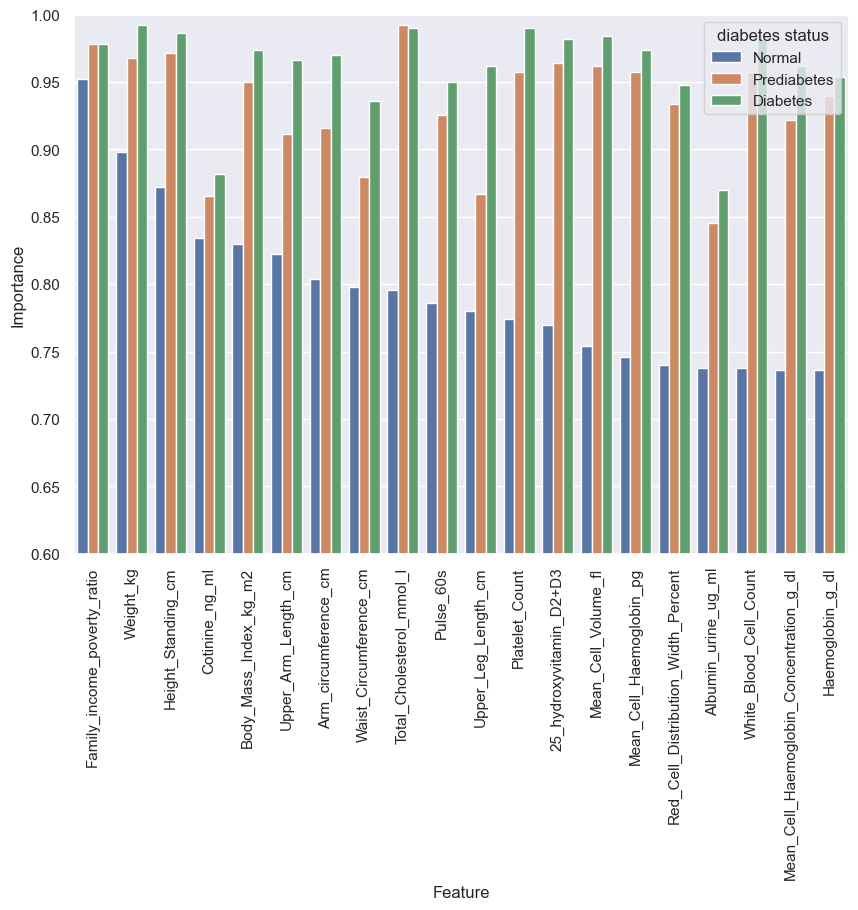

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")


# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart

# sns.barplot( 
#     x = "Feature",
#     y="Importance", 
#     data=normal_cf_df, 
 
#     ci=None, 
#     color='#69b3a2');


ax = sns.barplot(data=top_20.melt(id_vars='Feature',
                                  value_name='Importance', var_name='diabetes status'),
            x='Feature', y='Importance', hue='diabetes status')
ax.set_ylim(0.6, 1.0)

ax.set_xticklabels(labels = features, rotation=90)

[Text(0, 0, 'Family_income_poverty_ratio'),
 Text(1, 0, 'Weight_kg'),
 Text(2, 0, 'Height_Standing_cm'),
 Text(3, 0, 'Cotinine_ng_ml'),
 Text(4, 0, 'Body_Mass_Index_kg_m2'),
 Text(5, 0, 'Upper_Arm_Length_cm'),
 Text(6, 0, 'Arm_circumference_cm'),
 Text(7, 0, 'Waist_Circumference_cm'),
 Text(8, 0, 'Total_Cholesterol_mmol_l'),
 Text(9, 0, 'Pulse_60s'),
 Text(10, 0, 'Upper_Leg_Length_cm'),
 Text(11, 0, 'Platelet_Count'),
 Text(12, 0, '25_hydroxyvitamin_D2+D3'),
 Text(13, 0, 'Mean_Cell_Volume_fl'),
 Text(14, 0, 'Mean_Cell_Haemoglobin_pg'),
 Text(15, 0, 'Red_Cell_Distribution_Width_Percent'),
 Text(16, 0, 'Albumin_urine_ug_ml'),
 Text(17, 0, 'White_Blood_Cell_Count'),
 Text(18, 0, 'Mean_Cell_Haemoglobin_Concentration_g_dl'),
 Text(19, 0, 'Haemoglobin_g_dl')]

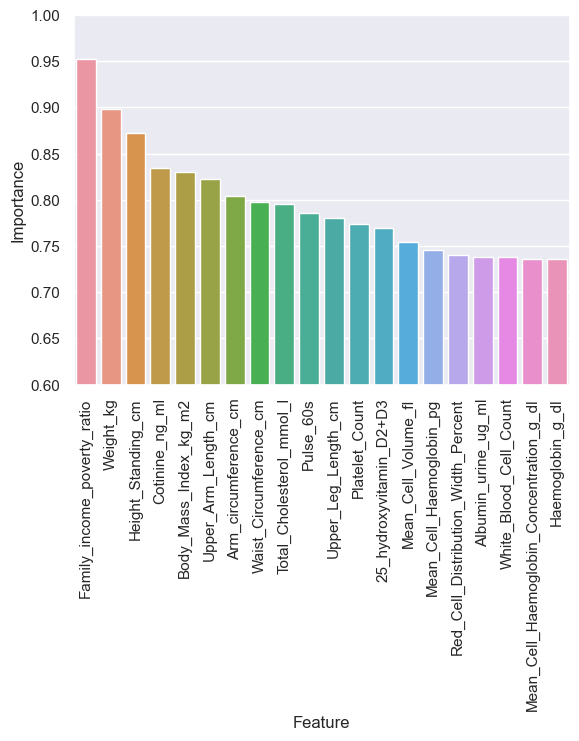

In [ ]:
normal_top_20 = normal_cf_df.head(20)
ax = sns.barplot(data=normal_top_20, x='Feature', y='Importance')
ax.set_ylim(0.6, 1.0)

ax.set_xticklabels(labels = normal_top_20.Feature, rotation=90)

[Text(0, 0, 'Total_Cholesterol_mmol_l'),
 Text(1, 0, 'Family_income_poverty_ratio'),
 Text(2, 0, 'Height_Standing_cm'),
 Text(3, 0, 'Weight_kg'),
 Text(4, 0, '25_hydroxyvitamin_D2+D3'),
 Text(5, 0, 'Mean_Cell_Volume_fl'),
 Text(6, 0, 'Direct_HDL_Cholesterol_mmol_l'),
 Text(7, 0, 'Platelet_Count'),
 Text(8, 0, 'Mean_Cell_Haemoglobin_pg'),
 Text(9, 0, 'White_Blood_Cell_Count'),
 Text(10, 0, 'Alkaline_phosphotase_U_L'),
 Text(11, 0, 'Body_Mass_Index_kg_m2'),
 Text(12, 0, 'Lactate_Dehydrogenase_U_l'),
 Text(13, 0, 'Triglycerides_refrig_serum_mmol_L'),
 Text(14, 0, 'Haemoglobin_g_dl'),
 Text(15, 0, 'Red_Cell_Distribution_Width_Percent'),
 Text(16, 0, 'Creatinine_umol_L'),
 Text(17, 0, 'Gamma_Glutamyl_Transferase_U_l'),
 Text(18, 0, 'Pulse_60s'),
 Text(19, 0, 'Mean_Platelet_Volumne_fl')]

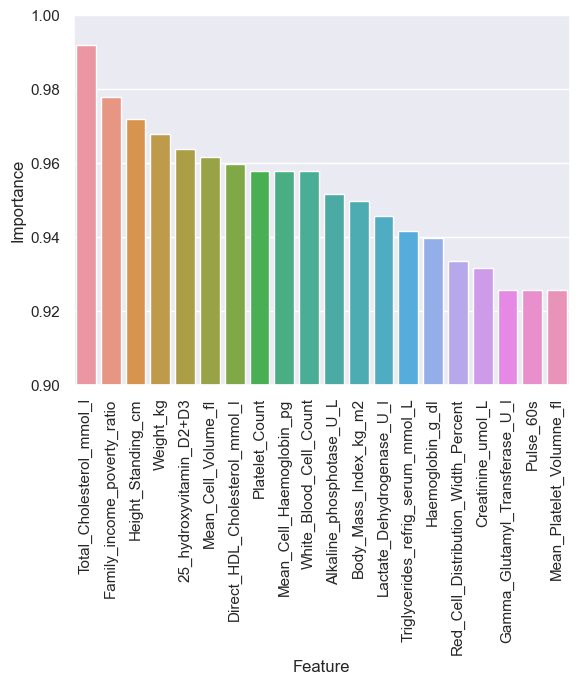

In [ ]:
predia_top_20 = predia_cf_df.head(20)
ax = sns.barplot(data=predia_top_20, x='Feature', y='Importance')
ax.set_ylim(0.9, 1.0)

ax.set_xticklabels(labels = predia_top_20.Feature, rotation=90)

[Text(0, 0, 'Weight_kg'),
 Text(1, 0, 'Total_Cholesterol_mmol_l'),
 Text(2, 0, 'Platelet_Count'),
 Text(3, 0, 'Triglycerides_refrig_serum_mmol_L'),
 Text(4, 0, 'Height_Standing_cm'),
 Text(5, 0, 'Mean_Cell_Volume_fl'),
 Text(6, 0, 'Direct_HDL_Cholesterol_mmol_l'),
 Text(7, 0, '25_hydroxyvitamin_D2+D3'),
 Text(8, 0, 'White_Blood_Cell_Count'),
 Text(9, 0, 'Alkaline_phosphotase_U_L'),
 Text(10, 0, 'Family_income_poverty_ratio'),
 Text(11, 0, 'Uric_acid_umol_L'),
 Text(12, 0, 'Body_Mass_Index_kg_m2'),
 Text(13, 0, 'Creatinine_umol_L'),
 Text(14, 0, 'Mean_Cell_Haemoglobin_pg'),
 Text(15, 0, 'Age_Years'),
 Text(16, 0, 'Arm_circumference_cm'),
 Text(17, 0, 'Upper_Arm_Length_cm'),
 Text(18, 0, 'Lactate_Dehydrogenase_U_l'),
 Text(19, 0, 'Upper_Leg_Length_cm')]

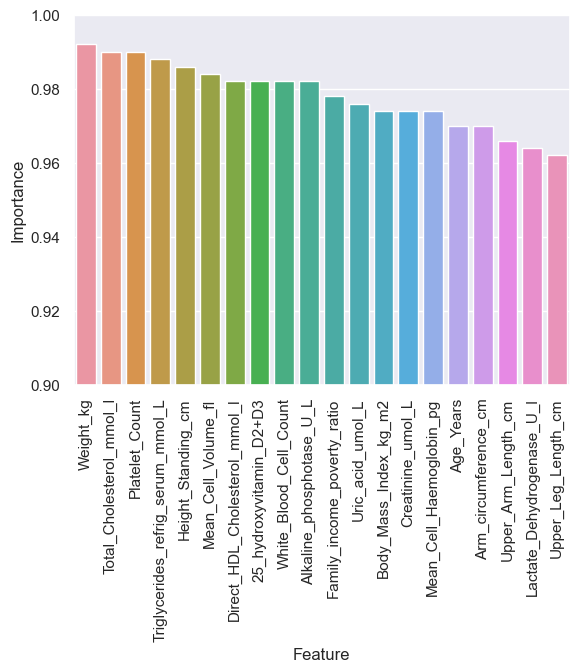

In [ ]:
dia_top_20 = dia_cf_df.head(20)
ax = sns.barplot(data=dia_top_20, x='Feature', y='Importance')
ax.set_ylim(0.9, 1.0)

ax.set_xticklabels(labels = dia_top_20.Feature, rotation=90)

In [ ]:
format = 'svg' #You should try the 'svg'

image = lgbm.to_graphviz(lgbm6)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('filename', format = format)

AttributeError: module 'lightgbm' has no attribute 'to_graphviz'

In [ ]:
# lgb.create_tree_digraph(lgbm6, show_info=['internal_count', 'leaf_count', 'leaf_weight', 'data_percentage'], example_case=X_train.iloc[3])



TypeError: __init__() got an unexpected keyword argument 'example_case'

In [ ]:
X_train.iloc[3]

Uric_acid_umol_L                     315.200
Blood_urea_nitrogen_mmol_L             4.280
Direct_HDL_Cholesterol_mmol_l         51.000
Body_Mass_Index_kg_m2                 25.000
Triglycerides_refrig_serum_mmol_L      1.264
                                      ...   
Weight_kg                              5.100
BMI_unknown                            1.000
Household_income_75-100k               0.000
ChildEd_None_KG                        0.000
ChildEd_6th_to_9thGrade                0.000
Name: 3, Length: 68, dtype: float64

In [ ]:
joblib.dump(lgbm6, 'lgbm_tuned.joblib')

['lgbm_tuned.joblib']

In [ ]:
lgbm_saved = joblib.load('lgbm_tuned.joblib')